In [2]:
#Import dataset
import pandas as pd
df_path='/path/to/tweets_depression.csv'

In [3]:
depression_tweets_df = pd.read_csv(df_path, sep = '|', header = None, usecols = range(0,9), nrows=3200)

In [4]:
#leave only cols with data
depression_tweets_df=depression_tweets_df[[0,1,2,5]]


In [5]:
#rename columns
depression_df=depression_tweets_df.rename(columns={0:'tweet_id',1:'tweet_date',2:'tweet_time',5:'tweet_text'})

In [6]:
depression_df.dropna(inplace=True)

In [7]:
depression_df=depression_df.reset_index(drop=True)

In [8]:
from nltk import word_tokenize

In [9]:
count_words=[len(word_tokenize(word)) for word in depression_df['tweet_text']]

<AxesSubplot:>

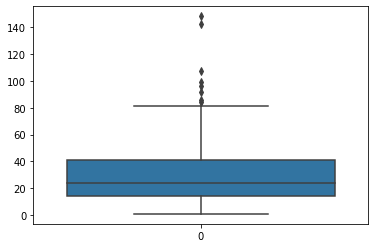

In [10]:
#Check average length of tweet
import seaborn as sns
sns.boxplot(count_words)

In [12]:
suicide_df=pd.read_csv('/path/to/tweets_suicide.csv')

In [13]:
count_words_suicide=[len(word_tokenize(word)) for word in suicide_df['tweet']]

<AxesSubplot:>

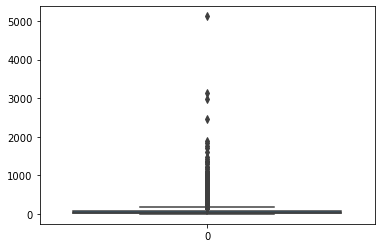

In [14]:
#We see that in suicide dataset we have very long tweets so decide to leave only tweets with max 140 words
sns.boxplot(count_words_suicide)

In [15]:
words_140_index=[]
for i in range(len(suicide_df['tweet'])):
    words=word_tokenize(suicide_df['tweet'].iloc[i])
    if len(words)>140:
        words_140_index.append(i)

In [16]:
suicide_df=suicide_df.drop(words_140_index, axis=0)

In [17]:
suicide_df=suicide_df.reset_index(drop=True)

In [18]:
count_words_suicide=[len(word_tokenize(word)) for word in suicide_df['tweet']]

<AxesSubplot:>

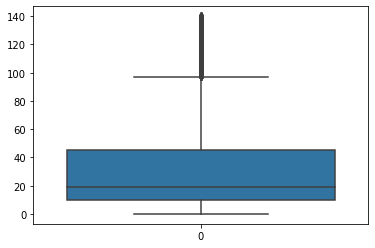

In [19]:
sns.boxplot(count_words_suicide)

In [20]:
#In suicide df distribution of target values is uneven so we decide append data from depression df which are all labelled to 1
suicide_df['label'].value_counts()

0    5121
1    2531
Name: label, dtype: int64

In [21]:
labels=[1]*len(depression_df)

In [22]:
labels

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [23]:
depression_df['label']=labels

In [24]:
depression_df

,tweet_id,tweet_date,tweet_time,tweet_text,label
0,989292962323615744,2018-04-25,23:59:57,The lack of this understanding is a small but ...,1
1,989292959844663296,2018-04-25,23:59:56,i just told my parents about my depression and...,1
2,989292951716155392,2018-04-25,23:59:54,depression is something i don't speak about ev...,1
3,989292873664393218,2018-04-25,23:59:35,Made myself a tortilla filled with pb&j. My de...,1
4,989292856119472128,2018-04-25,23:59:31,@WorldofOutlaws I am gonna need depression med...,1
...,...,...,...,...,...
2308,989036568781389830,2018-04-25,07:01:08,Many sufferers of depression aren't sad; they ...,1
2309,989036542898397185,2018-04-25,07:01:01,No Depression by G Herbo is my mood from now o...,1
2310,989036488162766848,2018-04-25,07:00:48,What do you do when depression succumbs the br...,1
2311,989036488158572544,2018-04-25,07:00:48,Ketamine Nasal Spray Shows Promise Against Dep...,1


In [25]:
depression_df=depression_df[['label','tweet_text']].rename(columns={'tweet_text':'tweet'})

In [26]:
depression_df

,label,tweet
0,1,The lack of this understanding is a small but ...
1,1,i just told my parents about my depression and...
2,1,depression is something i don't speak about ev...
3,1,Made myself a tortilla filled with pb&j. My de...
4,1,@WorldofOutlaws I am gonna need depression med...
...,...,...
2308,1,Many sufferers of depression aren't sad; they ...
2309,1,No Depression by G Herbo is my mood from now o...
2310,1,What do you do when depression succumbs the br...
2311,1,Ketamine Nasal Spray Shows Promise Against Dep...


In [27]:
training_df=pd.concat([suicide_df,depression_df])

In [28]:
training_df=training_df.reset_index(drop=True)

In [29]:
import numpy as np
training_df=training_df.reindex(np.random.permutation(training_df.index))

In [30]:
training_df

,label,tweet
9378,1,Reading this helped me. Maybe good for Japanes...
8661,1,"Isolation, Depression & Being An Entrepreneur ..."
7537,1,some days i feel everything at once other days...
8012,1,In an interesting study on headaches more freq...
2772,0,my dog sam i miss you
...,...,...
2795,0,takes a bite these are really good cookies to...
4874,0,i need to burn windows cd and my both burners ...
8042,1,Stick to cut creases not cut wrists #depression
3638,0,are u going to add more dates in south americ...


In [31]:
training_df=training_df.reset_index(drop=True)

In [32]:
training_df['label'].value_counts()

0    5121
1    4844
Name: label, dtype: int64

In [35]:
#Function to clean tweet
import unicodedata
from nltk.stem import WordNetLemmatizer
import re
import preprocessor as p
from bs4 import BeautifulSoup
import demoji
from nltk.tokenize import word_tokenize
import contractions
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.stem import PorterStemmer
lem = WordNetLemmatizer()
ste=PorterStemmer()

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

def clean_tweet(text):
    
    #remove emoji
    text=demoji.replace(text,' ')
    # use tweets preprocessor to clean news
    text=p.clean(text)
    #remove html tags
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    #expand contractions
    text=contractions.fix(text)
    
    
    #remove accented characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    text=text.lower()
   
    #remove numbers
    text = re.sub("[^a-zA-Z]", " ", text)
    #tokenize text
    
    list_of_words=word_tokenize(text)
    #lemmatize words
    text = ' '.join([lem.lemmatize(word) for word in list_of_words])
    text=text.lower()
    
    
    return text

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/slisowski/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/slisowski/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [36]:
from tqdm import tqdm
cleaned_tweet=[]
for i in tqdm(range(len(training_df['tweet']))):
    c_tweet=clean_tweet(str(training_df['tweet'].iloc[i]))
    cleaned_tweet.append(c_tweet)

100%|██████████████████████████████████████| 9965/9965 [00:16<00:00, 617.03it/s]


In [37]:
len(cleaned_tweet)

9965

In [38]:
training_df['tweet_text']=cleaned_tweet

In [39]:
training_df.iloc[4622]

label                 1
tweet         depressed
tweet_text    depressed
Name: 4622, dtype: object

In [40]:
training_df=training_df.drop('tweet', axis=1)

In [ ]:
training_df.to_csv('/path/to/tweets_training.csv')